# Otoczka wypukła

In [301]:
import numpy as np
import pandas as pd
import datetime
import math
from decimal import Decimal,getcontext
from collections import deque
from random import uniform,randint
from bitalg.tests.test2 import Test
from bitalg.visualizer.main import Visualizer

In [302]:
TESTS = {} #globala tablica, ktora przechowduje mi czasy wykonania

### Przykładowe zastosowanie narzędzia do wizualizacji

In [303]:
def draw_example_1():
    vis = Visualizer()

    # point = (x, y)
    points = [
        (-62.781083483620016, 9.295526540248986),
        (-10.543100198806997, -26.080520917553812),
        (-81.64932184252287, -74.42163273030921),
        (-36.297317058417946, -72.91194239793609),
        (37.795092197502356, 57.71110085986143),
        (62.511149567563905, -29.172821102708937),
        (21.82806671019955, 2.647377124715007),
        (-46.24539555503924, 42.65521594922478),
        (-77.92302295134137, -7.666110427206263),
        (25.85862324263843, 62.49564419388622),
        (-27.71649622636616, -67.33453457840331),
        (94.83039177581244, -55.52473300629532),
        (-26.29675918891381, -51.30150933048958),
        (-70.11654929355294, 16.723865705806816),
        (26.682887992598097, -65.55763984116587),
        (57.03377667841906, -55.56635171240132),
        (-16.053624841650247, -42.333295668531456),
        (-56.810858686395505, -37.41219002465095),
        (15.604076302407279, -24.85779870929437),
        (-71.77261869976445, -12.306083264402673),
    ]
    # line_segment = ((x1, y1), (x2, y2))
    line_segments = [
        ((-81.64932184252287, -74.42163273030921), (-36.297317058417946, -72.91194239793609)),
        ((-36.297317058417946, -72.91194239793609), (26.682887992598097, -65.55763984116587)),
        ((26.682887992598097, -65.55763984116587), (94.83039177581244, -55.52473300629532)),
        ((94.83039177581244, -55.52473300629532), (37.795092197502356, 57.71110085986143)),
        ((37.795092197502356, 57.71110085986143), (25.85862324263843, 62.49564419388622)),
        ((25.85862324263843, 62.49564419388622), (-46.24539555503924, 42.65521594922478)),
        ((-46.24539555503924, 42.65521594922478), (-70.11654929355294, 16.723865705806816)),
        ((-70.11654929355294, 16.723865705806816), (-77.92302295134137, -7.666110427206263)),
        ((-77.92302295134137, -7.666110427206263), (-81.64932184252287, -74.42163273030921))
    ]
    vis.add_point(points, color="green")



    for line in line_segments:
        vis.add_line_segment(line, color="blue")

    return vis

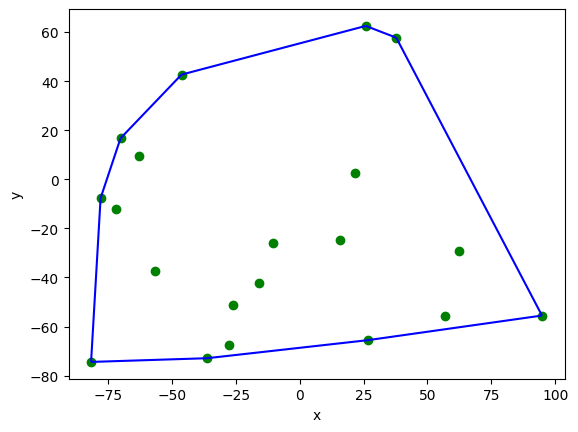

In [304]:
draw_example_1().show()

### Wprowadzenie

Czym jest otoczka wypukła?  
Podzbiór płaszczyzny $Q$ nazywamy wypukłym iff, gdy dla dowolnej pary punktów $p, q \in Q$ odcinek $\overline{pq}$ jest całkowicie zawarty w $Q$.  
Otoczka wypukła $\mathcal{CH}(Q)$ zbioru $Q$ jest najmniejszym wypukłym zbiorem zawierającym $Q$.

### Zastosowania otoczku wypukłej

Otoczki wypukłe - w szczególności otoczki wypukłe w przestrzeni trójwymiarowej - są spotykane w różnych zastosowaniach. Na przykład używa się ich do przyspieszania wykrywania kolizji w animacji komputerowej. Przepuśćmy, że chcemy sprawdzić, czy dwa obiekty $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się. Jeśli przez większość czasu odpowiedź na to pytanie jest negatywna, to opłaca się następująca strategia. Przybliżamy obiekty przez prostrze obiekty $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$, które zawierały orginały. Jeśli chcemy sprwadzić, czy $\mathcal{P_1}$ i $\mathcal{P_2}$ przecinają się, najpierw sprawdzamy, czy przecinają się $\widehat{\mathcal{P_1}}$ i $\widehat{\mathcal{P_2}}$. Jeśli występuje ten przypadek, to powinniśmy wykonać test na orginalnych obiektach, który jest przepuszczalnie znacznie kosztowniejszy.  
Sprawdzanie przecięcia otoczek wypukłych jest bardziej skomplikowane niż dla sfer - choć mimo to łatwiejsze niż dla obiektów niewypukłych - ale otoczki wypukłe mogą dużo lepiej przybliżać większość obiektów.

## Generowanie losowych punktów na płaszczyźnie 

Zapoznaliśmy się i wiemy jak generowac losowe punkty na płaszczyźnie z laboratorium I (współrzędne rzeczywiste typu *double* - podwójna precyzja obliczeń). Przygotuj zestawy punktów, które będzie można użyć jako testowe dla algorytmów obliczania otoczki wypukłej.

Uzupełnij funkcję ```generate_uniform_points```.

In [305]:
def generate_uniform_points(left=-100, right=100, n=100):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym
    obszarze od left do right (jednakowo na osi y)
    o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
             np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    points=[None]*n
    for i in range(n): points[i]=(uniform(left,right),uniform(left,right))
    return points

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x \in \langle -100,100 \rangle$ oraz $y \in \langle -100,100\rangle$.

In [306]:
points_a = generate_uniform_points(-100, 100, 100)

Zwizualizuj wygenerowane punkty.

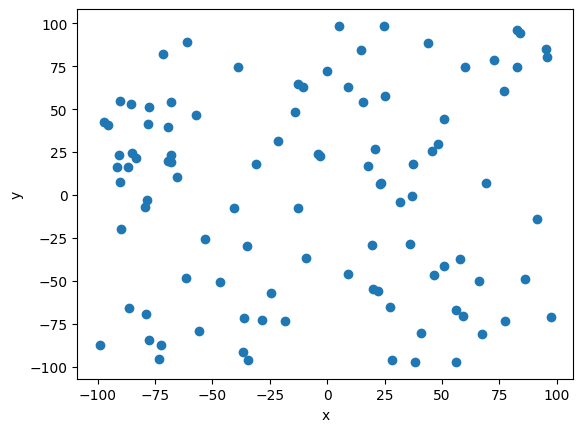

In [307]:
# visualize(points_a)
vis = Visualizer()
vis.add_point(points_a)
vis.show()

Uzupełnij funkcję ```generate_circle_points```.

In [308]:
def generate_circle_points(O, R, n=100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    points=[None]*n
    for i in range(n):
        engle=uniform(0,360)
        points[i]=(R*np.cos(engle)+O[0],R*np.sin(engle)+O[1])
    return points

<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $O = (0,0)$ i promieniu $R = 10$.

In [309]:
points_b = generate_circle_points((0, 0), 10, 100)

Zwizualizuj wygenerowane punkty.

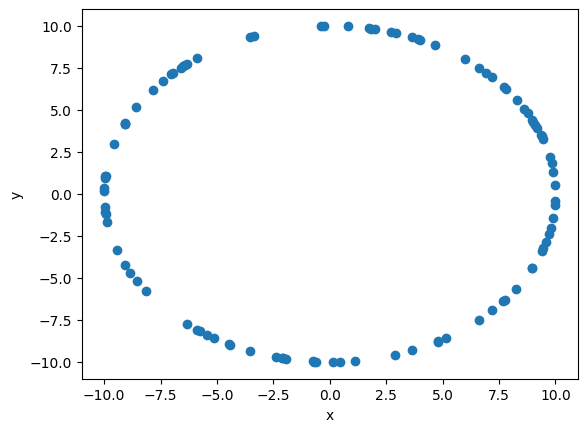

In [310]:
# visualize(points_b)
vis.clear()
vis.add_point(points_b)
vis.show()

Jak można było zauważyć, to funkcje ```generate_uniform_points``` oraz ```generate_circle_points``` są takie same jak w laboratorium I.

Uzupełnij funkcję ```generate_rectangle_points```.

In [311]:
class LineFunction:
    def __init__(self,a,b):
        self.oneline = False #zabezpiecznie przed funkcjami typu x=0
        self.factorA,self.factorB = self.calculateFactors(a,b)
        self.x_min=min(a[0],b[0])
        self.x_max=max(a[0],b[0])
        self.y_min=min(a[1],b[1])
        self.y_max=max(a[1],b[1])

    def calculateFactors(self,a,b) -> tuple[any,any]:
        x_a,y_a=a
        x_b,y_b=b
        if (x_b-x_a)!=0:
            A=(y_b-y_a)/(x_b-x_a)
            B=y_a-A*x_a
            self.oneline = False
            return A,B
        else:
            self.oneline = True
            return 0,0

    def calculateY(self,x):
        if not self.oneline: return x*self.factorA+self.factorB
        return uniform(self.y_min,self.y_max)

    def addedToQueue(self,x):
        return self.x_min <= x <= self.x_max

In [312]:
def generate_rectangle_points_first(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    Pierwszy sposob generowania punktow polega na tym, ze na poczatku generuje wartosc x z odpowiedniego zakresu, a nastepnie
    przyporzadkowouej go do odpowiednich prostych (krawedzi prostokata) w ktroym moglby byc, a nastpenie losuje w ktorej
    prostej bedzie i tak przyporzadkowuje punkty - jest to zupelnie inny sposob niz, wlasnie sposob pierwszy.

    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    min_x,max_x=LineFunction(a,c).x_min,LineFunction(a,c).x_max
    lineAB=LineFunction(a,b) #0
    lineBC=LineFunction(b,c) #1
    lineCD=LineFunction(c,d) #2
    lineDA=LineFunction(d,a) #3
    points=[None]*n
    for i in range(n):
        Q=[]
        x=uniform(min_x,max_x) #wyznaczam losowy punkt w zakresie x.
        if lineAB.addedToQueue(x): Q.append(0)
        if lineBC.addedToQueue(x): Q.append(1)
        if lineCD.addedToQueue(x): Q.append(2)
        if lineDA.addedToQueue(x): Q.append(3)
        can_choices=len(Q) #licze do ilu prostych zostal przyporzadkowany moj x
        choose=Q[randint(0,can_choices-1)] #wybieram losowo jedena z prostych ktora zostala przyporzadkowana
        if choose==0:
            y=lineAB.calculateY(x)
        if choose==1:
            y=lineBC.calculateY(x)
        if choose==2:
            y=lineCD.calculateY(x)
        if choose==3:
            y=lineDA.calculateY(x)
        points[i]=(x,y)
    return points


In [313]:
def generate_rectangle_points_second(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=100):
    '''
    W drugim sposobie generowania punktow na prostokacie bede na kadzdym razem wybieral odpowiednia prosta, zgodnie ze wskazokwami
    zegara. Ale juz polozenie na konkretnej prostej bedzie przebiegalo w sposb losowy.

    Funkcja generuje n punktów na obwodzie prostokąta
    o wierzchołkach w punktach a, b, c i d
    :param a: lewy-dolny wierzchołek prostokąta
    :param b: prawy-dolny wierzchołek prostokąta
    :param c: prawy-górny wierzchołek prostokąta
    :param d: lewy-górny wierzchołek prostokąta
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    lineAB=LineFunction(a,b) #0
    lineBC=LineFunction(b,c) #1
    lineCD=LineFunction(c,d) #2
    lineDA=LineFunction(d,a) #3
    points=[None]*n
    choose=0
    for i in range(n):
        choose=choose%4
        if choose==0:
            x=uniform(lineAB.x_min,lineAB.x_max)
            y=lineAB.calculateY(x)
        if choose==1:
            x=uniform(lineBC.x_min,lineBC.x_max)
            y=lineBC.calculateY(x)
        if choose==2:
            x=uniform(lineCD.x_min,lineCD.x_max)
            y=lineCD.calculateY(x)
        if choose==3:
            x=uniform(lineDA.x_min,lineDA.x_max)
            y=lineDA.calculateY(x)
        points[i]=(x,y)
        choose+=1
    return points


<span style="color:red">Ćw.</span> Wygeneruj $100$ losowych punktów w przestrzeni 2D leżących na obwodzie prostokąta, którego wyznaczają wierzchołki
$(-10,-10), (10,-10), (10,10)$ oraz $(-10,10)$.

In [314]:
points_c = generate_rectangle_points_second(
    (-10, -10), (10, -10), (10, 10), (-10, 10), 100)

Zwizualizuj wygenerowane punkty.

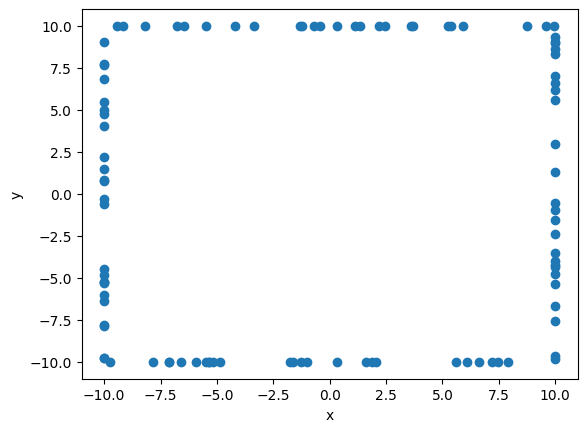

In [315]:
# visualize(points_c)
vis.clear()
vis.add_point(points_c)
vis.show()

Uzupełnij funkcję ```generate_square_points```.

In [316]:
def generate_square_points(a=(0, 0), b=(10, 0), c=(10, 10), d=(0, 10),
                           axis_n=25, diag_n=20): #zakladam ze prostokat musi byc zaczepiony o dany uklad wspolrzednych
    '''
    Funkcja generuje axis_n punktów na dwóch bokach kwadratu
    leżących na osiach x i y oraz diag_n punktów na
    przektąnych kwadratu, którego wyznaczają punkty
    a, b, c i d.
    :param a: lewy-dolny wierzchołek kwadratu
    :param b: prawy-dolny wierzchołek kwadratu
    :param c: prawy-górny wierzchołek kwadratu
    :param d: lewy-górny wierzchołek kwadratu
    :param axis_n: ilość generowanych punktów na każdym
                   z boków przylegających do konkretnej osi
    :param diag_n: ilość generowanych punktów na każdej
                   przekątnej kwadratu
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    lineOX = LineFunction(a,b)
    lineOY = LineFunction(a,d)
    lineDiagonalAC = LineFunction(a,c)
    lineDiagonalBD = LineFunction(b,d)

    points=[a,b,c,d]

    for i in range(axis_n): #generujemy punkty na osiach, a wiec nie ma znaczenia funkcja
        x_ox = uniform(lineOX.x_min,lineOX.x_max)
        y_ox = lineOX.calculateY(x_ox)
        points.append((x_ox,y_ox))

        x_oy = uniform(lineOY.x_min,lineOY.x_max)
        y_oy = lineOY.calculateY(x_oy)
        points.append((x_oy,y_oy))

    for i in range(diag_n): #generujemy punkty na przekatnych, wiec bedzie mialo znaczenie gdzie je generujemy
        x_diag_ac = uniform(lineDiagonalAC.x_min,lineDiagonalAC.x_max)
        y_diag_ac = lineDiagonalAC.calculateY(x_diag_ac)
        points.append((x_diag_ac,y_diag_ac))

        x_diag_bd = uniform(lineDiagonalBD.x_min,lineDiagonalBD.x_max)
        y_diag_bd = lineDiagonalBD.calculateY(x_diag_bd)
        points.append((x_diag_bd,y_diag_bd))

    return points

<span style="color:red">Ćw.</span> Wygeneruj losowe punktów w przestrzeni 2D w następujący sposób: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu, zawierający punkty wyznaczające kwadrat $(0, 0), (10, 0), (10, 10)$ oraz $(0, 10)$.

In [317]:
points_d = generate_square_points(
    (0, 0), (10, 0), (10, 10), (0, 10), 25, 20)

Zwizualizuj wygenerowane punkty.

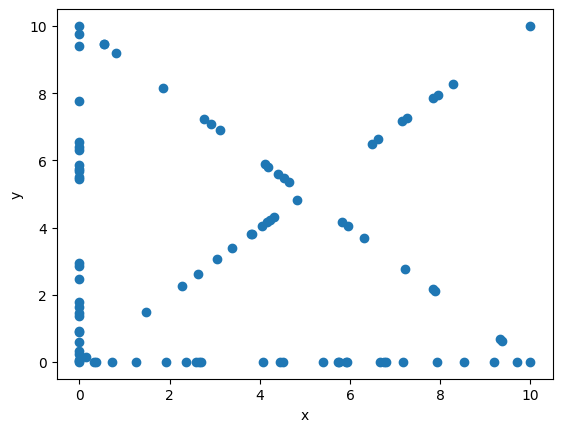

In [318]:
# visualize(points_d)
vis.clear()
vis.add_point(points_d)
vis.show()

## Algorytm Grahama oraz algorytm Jarvisa

Po przygotowaniu przykładowych zbiorów danych i ich zwizualizowaniu, chcemy zobaczyć jak buduje się dla nich otoczka wypukła z wykorzystaniem różnych algortymów.  
W tych dwóch algorytmach potrzebna będzie funkcja którą już dobrze znamy, czyli funkcja, która sprawdza po której stornie prostej znajduje się punkt.  
Dla każdego algorytmu trzeba będzie zaimplementować dwie funkcje obliczające otoczkę wypukłę, ze względu, że jedna z nich będzie miała możliwość wyświetlania kroków postępowania w algorytmie. Druga funkcja będzie uzyteczna do porównywania czasów dla różnych zbiorów danych i względęm algorytmów.  
W graficznej funkcji danego algorytmu, jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualne rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki, wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).  

### Algorytm Grahama

Algorytm Grahama tworzy otoczkę wypukłą poprzez utrzymywanie stosu $S$, w którym znajdują się punkty, które mogą, ale nie muszą tworzyć otoczki wypukłej. Za każdym razem jest wstawiany na stos (push) jeden punkt z zbioru punktów $Q$ i jest on usuwany ze stosu (pop), jeżeli nie jest punktem $\mathcal{CH}(Q)$. Kiedy algorytm kończy się, stos $S$ zawiera tylko punkty otoczki wypukłej $\mathcal{CH}(Q)$ w kierunku przeciwnym do ruchu wskazówek zegera.

---

Procedura $\mathtt{Graham-Build(Q)}$ przyjmuje zbiór punktów $Q$, gdzie $|Q| \geq 3$. Wywołuje ona funkcję $\mathtt{TOP(S)}$, która zwraca punkt z góry stosu bez zmieniania $S$ oraz
$\mathtt{NEXT-TO-TOP(S)}$, która zwraca punkt ponieżej góry stosu $S$, bez zmieniania stosu. Funkcja $\mathtt{PUSH(p, S)}$ wstawia punkt $p$ na stos $S$. Funkcja $\mathtt{POP(p, S)}$ usuwa punkt $p$ ze stosu $S$.

$\mathtt{Graham-Build(Q)}$  
1)  niech $p_0$ będzie punktem w zbiorze Q z najmniejszą współrzędną $y$,  
    oraz najmniejszą współrzędną $x$ w przypadku, gdy wiele punktów ma tą samą współrzędną $x$  
    
2)  nich $\mathtt{\langle p_1, p_2, \dots, p_m \rangle}$ będzie pozostałym zbiorem punktów w $Q$ posortowanym  
    zgodnie z przeciwnym ruchem wskazówek zegara wokół punktu $p_0$  
    (jeżeli więcej niż jeden punkt ma ten sam kąt to usuwamy wszystkie punkty  
     z wyjątkiem tego najbardziej oddalonego od $p_0$)  
3) stwórz pusty stos $S$  
4) $\mathtt{PUSH(p_0, S)}$
5) $\mathtt{PUSH(p_1, S)}$
6) $\mathtt{PUSH(p_2, S)}$
7) **for** $i = 3$ **to** m  
8) &emsp;**while** kąt utworzony przez $\mathtt{NEXT-TO-TOP(S)}$, $\mathtt{TOP(S)}$ oraz $p_i$ tworzy lewostronny skręt
9) &emsp;&emsp;$\mathtt{POP(S)}$
10) &emsp;$\mathtt{PUSH(p_i, S)}$
11) **return** $S$


---

Lewostronny skręt oznacza, że dla trzech kolejnych punktów $a, b, c$, punkt $b$ leży po lewej stronie prostej $ac$.  
  

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama.

In [319]:
def mat_det_2x2(a, b, c):
    a_x=a[0]
    a_y=a[1]
    b_x=b[0]
    b_y=b[1]
    c_x=c[0]
    c_y=c[1]
    return (a_x-c_x)*(b_y-c_y)-(a_y-c_y)*(b_x-c_x)

In [320]:
def mat_det_3x3(a, b, c):
    if a[0]==b[0]==c[0] or a[1]==b[1]==c[1]: return 0 #zabezpieczenie przed niewspołliniowoscia
    getcontext().prec = 17 #stosuje dodatkowe przyblizenie
    a_x=Decimal(a[0])
    a_y=Decimal(a[1])
    b_x=Decimal(b[0])
    b_y=Decimal(b[1])
    c_x=Decimal(c[0])
    c_y=Decimal(c[1])
    return (a_x*b_y*1)+(a_y*1*c_x)+(1*b_x*c_y)-(1*b_y*c_x)-(a_y*b_x*1)-(a_x*1*c_y)

In [321]:
def calculateDistance(a,b): #funkcja liczaca odleglosc miedzy punktami a oraz b
    return ((a[0]-b[0]) ** 2 + (a[1]-b[1]) ** 2) ** (1/2)

In [322]:
class MergeSort:
    def __init__(self,array:list):
        self.smallestPoint = self._getSmallestPoint(array)
        self.sortedList = self._mergeSort(array)
        self.solutionList = self._reciveSol()

    def _reciveSol(self):
        solutionArray = [self.smallestPoint]

        for i in range(len(self.sortedList)):
            if self.sortedList[i]!=self.smallestPoint:
                solutionArray.append(self.sortedList[i])

        return solutionArray


    def _merge(self,array1,array2):
        n1=len(array1)
        n2=len(array2)
        new_array=[]
        i=0
        j=0
        while i<n1 or j<n2:
            if i<n1 and j<n2 and (self.smallestPoint!=array1[i] and self.smallestPoint!=array2[j]):
                if mat_det_2x2(self.smallestPoint,array1[i],array2[j])>0: #punkt array1[i] ma mneijszy kat,
                    new_array.append(array1[i])
                    i+=1
                elif mat_det_2x2(self.smallestPoint,array1[i],array2[j])<0: #punkt array2[j] ma mneijszy kat
                    new_array.append(array2[j])
                    j+=1
                else: #mat_det_3x3(smallest_point,array1[i],array2[j]) == 0; punkty sa wspołniniowe, a wiec biore ten ktory jest dalej
                    if calculateDistance(self.smallestPoint,array1[i])>=calculateDistance(self.smallestPoint,array2[j]):
                        new_array.append(array1[i])
                        i += 1
                        j += 1
                    else:
                        new_array.append(array2[j])
                        i += 1
                        j += 1

            elif i<n1  and j>=n2 and (self.smallestPoint!=array1[i]):
                new_array.append(array1[i])
                i += 1

            elif i>=n1 and j<n2  and (self.smallestPoint!=array2[j]):
                new_array.append(array2[j])
                j += 1

            elif (self.smallestPoint==array1[i] or self.smallestPoint==array2[j]):
                if self.smallestPoint==array1[i]: i+=1 #poniewaz tylko jeden z nich moze miec ten indeks
                if self.smallestPoint==array2[j]: j+=1
        return new_array

    def _split(self,array):
        n=len(array)
        tab1=[]
        tab2=[]
        for i in range(0,n):
            if i<=math.floor((n-1)/2):
                tab1.append(array[i])
            else:
                tab2.append(array[i])
        return tab1,tab2

    def _mergeSort(self,array):
        if len(array)<=1:
            return array
        left,right=self._split(array)
        left=self._mergeSort(left)
        right=self._mergeSort(right)
        return self._merge(left,right)

    def _getSmallestPoint(self,array):
        n=len(array)
        tempSmallestPoint=(float('inf'),float('inf'))

        for i in range(n):  # znajduje minimum O(n)
            x_q = array[i][0]
            y_q = array[i][1]
            if y_q < tempSmallestPoint[1]:
                tempSmallestPoint=(x_q, y_q)
            elif y_q == tempSmallestPoint[1] and x_q < tempSmallestPoint[0]:
                tempSmallestPoint = (x_q, y_q)

        return tempSmallestPoint

In [323]:
def graham_algorithm(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    Q = MergeSort(Q).solutionList
    m=len(Q)
    if m<3:
        return Q #otoczka jest caly zbior danych
    else:
        S=deque()
        S.append(Q[0])
        S.append(Q[1])
        next_to_top=Q[0]
        top=Q[1]
        for i in range(2,m):
            while mat_det_2x2(next_to_top,top,Q[i])<=0 and len(S)>=3:
                S.pop()
                top=S[-1]
                next_to_top=S[-2]
            S.append(Q[i])
            next_to_top=top
            top=Q[i]
        return list(S)


Przetestuj swoją implementacje algorytmu Grahama, by sprawdzić czy poprawnie obliczana jest otoczka.

In [324]:
Test().runtest(1, graham_algorithm)

Lab 2, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 4.625s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```graham_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Grahama z dodatkową opcją wyświetlania kroków algorytmu.

In [325]:
def graham_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Grahama oraz
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''
    visGraham = Visualizer()
    visGraham.add_title('Convex hull - Graham Algorithm')
    visGraham.add_grid()
    visGraham.add_point(Q,color="paleturquoise")
    Q = MergeSort(Q).solutionList
    m=len(Q)
    if 0<m<3:
        visGraham.add_point(Q[0],color="tomato")
        for i in range(1,m):
            visGraham.add_line_segment((Q[i],Q[i-1]),color="deeppink")
            visGraham.add_point(Q[i],color="tomato")

        return Q,visGraham
    else:
        S=deque()
        D=deque()
        E=[]
        S.append(Q[0])
        visGraham.add_point(Q[0],color="tomato")

        S.append(Q[1])
        visGraham.add_point(Q[1],color="tomato")
        edge=visGraham.add_line_segment((Q[0],Q[1]),color="deeppink")
        E.append(edge)
        D.append(edge)

        next_to_top=Q[0]
        top=Q[1]



        for i in range(2,m):
            visGraham.add_point(Q[i],color="tomato")
            edge=visGraham.add_line_segment((top,Q[i]),color="deeppink")
            E.append(edge)
            D.append(edge)
            while mat_det_2x2(next_to_top,top,Q[i])<=0 and len(S)>=3:

                visGraham.add_point(top,color="pink")
                visGraham.remove_figure(D.pop())
                visGraham.remove_figure(D.pop())

                S.pop()
                top=S[-1]
                next_to_top=S[-2]
                edge=visGraham.add_line_segment((top,Q[i]),color="deeppink")
                E.append(edge)
                D.append(edge)

            S.append(Q[i])
            next_to_top=top
            top=Q[i]

        visGraham.add_line_segment([list(S)[-1], list(S)[0]],color="deeppink")
        return list(S),visGraham


Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [326]:
start = datetime.datetime.now()
graham_points_a, vis_graham_a = graham_algorithm_draw(points_a)
stop = datetime.datetime.now()
TESTS["graham_points_a"] = round((stop - start).total_seconds(),6)

In [327]:
vis_graham_a.save_gif(filename="graham_algorithm_gifs/points_a",interval=1)

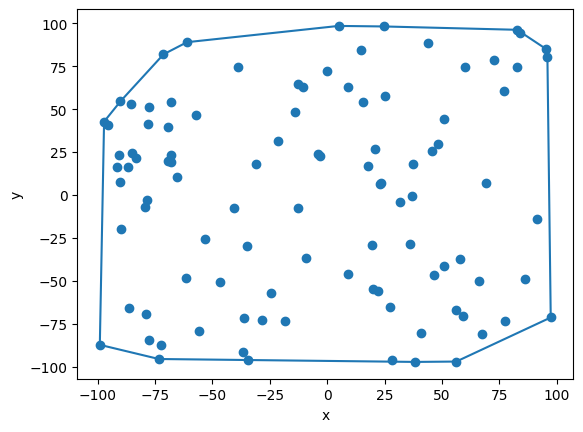

In [328]:
# visualize(graham_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(graham_points_a[i], graham_points_a[i+1]) for i in range(len(graham_points_a)-1)])
vis.add_line_segment([graham_points_a[-1], graham_points_a[0]])
vis.show()

Zbiór danych B

In [329]:
start = datetime.datetime.now()
graham_points_b, vis_graham_b = graham_algorithm_draw(points_b)
stop = datetime.datetime.now()
TESTS["graham_points_b"] = round((stop - start).total_seconds(),6)

In [330]:
vis_graham_b.save_gif(filename="graham_algorithm_gifs/points_b",interval=1)

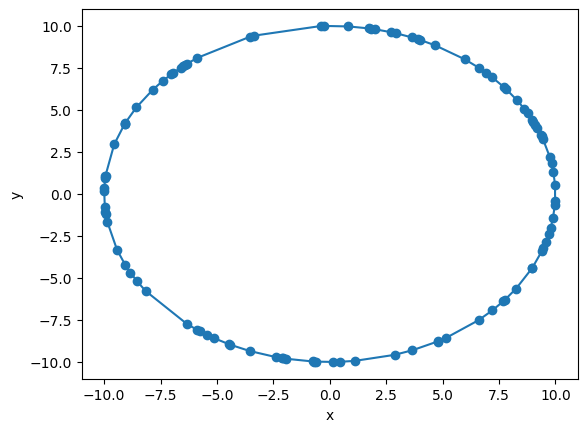

In [331]:
# visualize(graham_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(graham_points_b[i], graham_points_b[i+1]) for i in range(len(graham_points_b)-1)])
vis.add_line_segment([graham_points_b[-1], graham_points_b[0]])
vis.show()

Zbiór danych C

In [332]:
start = datetime.datetime.now()
graham_points_c, vis_graham_c = graham_algorithm_draw(points_c)
stop = datetime.datetime.now()
TESTS["graham_points_c"] = round((stop - start).total_seconds(),6)

In [333]:
vis_graham_c.save_gif(filename="graham_algorithm_gifs/points_c",interval=1)

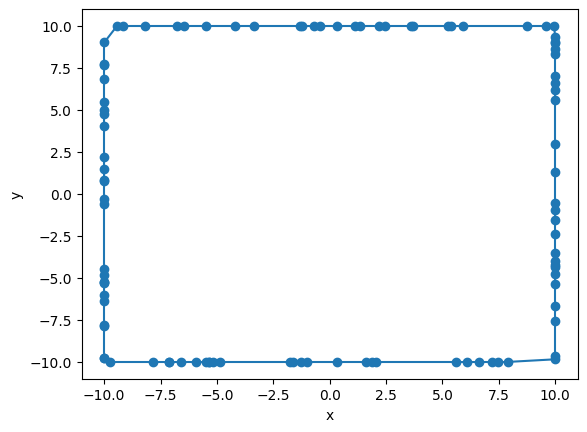

In [334]:
# visualize(graham_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(graham_points_c[i], graham_points_c[i+1]) for i in range(len(graham_points_c)-1)])
vis.add_line_segment([graham_points_c[-1], graham_points_c[0]])
vis.show()

Zbiór danych D

In [335]:
start = datetime.datetime.now()
graham_points_d, vis_graham_d = graham_algorithm_draw(points_d)
stop = datetime.datetime.now()
TESTS["graham_points_d"] = round((stop - start).total_seconds(),6)

In [336]:
vis_graham_d.save_gif(filename="graham_algorithm_gifs/points_d",interval=1)

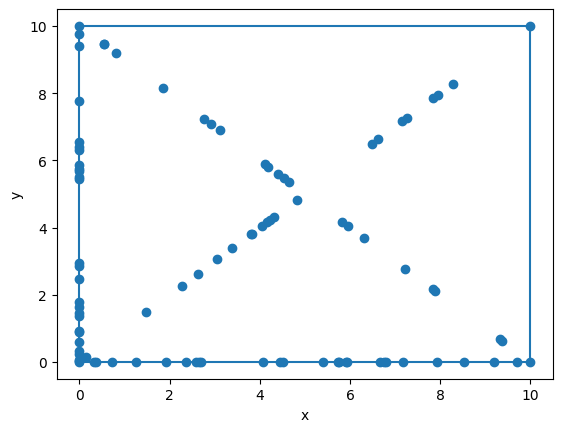

In [337]:
# visualize(graham_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(graham_points_d[i], graham_points_d[i+1]) for i in range(len(graham_points_d)-1)])
vis.add_line_segment([graham_points_d[-1], graham_points_d[0]])
vis.show()

### Algorytm Jarvisa

Algorytm Jarvisa oblicza otoczkę wypukłą dla zbioru punktów $Q$ przez technikę zwaną owijaniem paczki (*package wrapping*) lub owijaniem prezentu (*gift wrapping*). Algorytm Jarvisa buduje sekwencję $H = \langle p_1, p_2, \dots, p_m \rangle$ będącą wierzchołkami $\mathcal{CH}(Q)$. Zaczynamy od punktu $p_0$, następny punkt $p_1$ w otoczce wypukłej ma najmniejszy kąt w odniesieniu do $p_0$ (w przypadku takiego samego kąta - wybiera się punkt najdalej od $p_0$). Podobnie, gdy $p_2$ ma najmniejszy kąt w odniesieniu do $p_1$, itd.. Zauważyć warto, że możemy tym sposobem obliczyć lewy i prawy łańcuch otoczki wypukłej $\mathcal{CH}(Q)$. Lewy łańcuch buduje się podobnie. Gdy osiągniemy najwyższy wierzchołej w prawym łańcuchu $p_k$, wybieramy wierzchołek $p_{k+1}$, który ma najmniejszy kąt w odniesieniu do $p_k$, ale od ujemnej osi-$x$. Można zaimplementować algorytm Jarvisa bez konstruowania pomocniczych łańcuchów - lewego i prawego. Taka implementacja utrzymuje śledzenie kąta ostatniej strony otoczki wypukłej i wymaga sekwencji kątów boków otoczki tylko rosnącej. (Patrząc na trzy ostatnie punkty jesteśmy w stanie obliczyć jaki punkt należy włączyć do $\mathcal{CH}(Q)$ w zależności od budowanego punktu)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa.

In [338]:
def getSmallestPoint(array,id_avoid=None):
    n=len(array)
    tempSmallestPoint = (float('inf'),float('inf'))
    tempSmallestPointId = -1

    for i in range(n):
        if i!=id_avoid:
            x_q = array[i][0]
            y_q = array[i][1]
            if y_q < tempSmallestPoint[1]:
                tempSmallestPoint=(x_q, y_q)
                tempSmallestPointId=i
            elif y_q == tempSmallestPoint[1] and x_q < tempSmallestPoint[0]:
                tempSmallestPoint = (x_q, y_q)
                tempSmallestPointId=i

    return tempSmallestPoint,tempSmallestPointId

In [339]:
def jarvis_algorithm(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa
    :parm Q: zbiór punktów
    :return: tablica punktów w postaci krotek współrzędnych
    '''
    n=len(Q)
    smallestPoint,_= getSmallestPoint(Q)
    S = [smallestPoint]
    while True:
        endpoint = Q[0]  #bierzemy pierwszy lepszy punkt jako kandydat na kolejny punkt nalezacy do otoczki
        for j in range(n):
            if endpoint == S[-1] or mat_det_2x2(Q[j], S[-1], endpoint)<0: #opakowuje prezent
                endpoint = Q[j]
            elif mat_det_2x2(Q[j], S[-1], endpoint) == 0: #biore dalszy punkt
                if calculateDistance(Q[j],S[-1]) >= calculateDistance(endpoint,S[-1]):
                    endpoint = Q[j]
        if endpoint == S[0]: break
        pointOnHull = endpoint
        S.append(pointOnHull)
    return S

Przetestuj swoją implementacje algorytmu Jarvisa, by sprawdzić czy poprawnie obliczana jest otoczka.

In [340]:
Test().runtest(2, jarvis_algorithm)

Lab 2, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
	Test 11: Passed
Result: 11/11
Time: 4.430s


<span style="color:red">Ćw.</span> Uzupełnij funkcję ```jarvis_algorithm_draw```, która oblicza otoczkę wypukłą korzystając z algorytmu Jarvisa z dodatkową opcją wyświetlania kroków algorytmu.

In [341]:
def jarvis_algorithm_draw(Q):
    '''
    Funkcja buduje otoczkę wypukłą dla podanego
    zbioru punktów Q algorymem Jarvisa oraz 
    pokazuje poszczególne kroki algorymu
    :parm Q: zbiór punktów
    :return: krotka w postaci  (tablica punktów w postaci krotek współrzędnych,
                                wizualizer pokazujący kroki algorytmu) 
    '''
    visJarvis = Visualizer()
    visJarvis.add_title('Convex Hull - Jarvis Algorithm')
    visJarvis.add_grid()
    visJarvis.add_point(Q,color = "paleturquoise")

    n=len(Q)
    smallestPoint,_= getSmallestPoint(Q)

    S = [smallestPoint]
    E = []
    D = deque()
    visJarvis.add_point(S[0], color = "tomato")

    while True:
        endpoint = Q[0]  #bierzemy pierwszy lepszy punkt jako kandydat na kolejny punkt nalezacy do otoczki
        visJarvis.add_point(endpoint, color = "tomato") #zanaczam rozpatrywany punkt
        edge = visJarvis.add_line_segment((S[-1],endpoint), color = "deeppink")
        E.append(edge)
        D.append(edge)

        for j in range(n):
            if endpoint == S[-1] or mat_det_2x2(Q[j], S[-1], endpoint) < 0 or \
                    (mat_det_2x2(Q[j], S[-1], endpoint) == 0 and
                     calculateDistance(Q[j],S[-1]) >= calculateDistance(endpoint,S[-1])):

                visJarvis.remove_figure(D.pop())
                visJarvis.add_point(endpoint, color = "pink")

                endpoint = Q[j]

                visJarvis.add_point(endpoint, color = "tomato")
                edge = visJarvis.add_line_segment((S[-1],endpoint), color = "deeppink")
                E.append(edge)
                D.append(edge)

        if endpoint == S[0]: break
        pointOnHull = endpoint
        S.append(pointOnHull)

    visJarvis.add_line_segment([list(S)[-1], list(S)[0]],color="deeppink")

    return S,visJarvis

Zwizualizuj swoją implementację algorytmu.

Zbiór danych A

In [342]:
start = datetime.datetime.now()
jarvis_points_a, vis_jarvis_a = jarvis_algorithm_draw(points_a)
stop = datetime.datetime.now()
TESTS["jarvis_points_a"] = round((stop - start).total_seconds(),6)

In [343]:
vis_jarvis_a.save_gif(filename="jarvis_algorithm_gifs/points_a",interval=1)

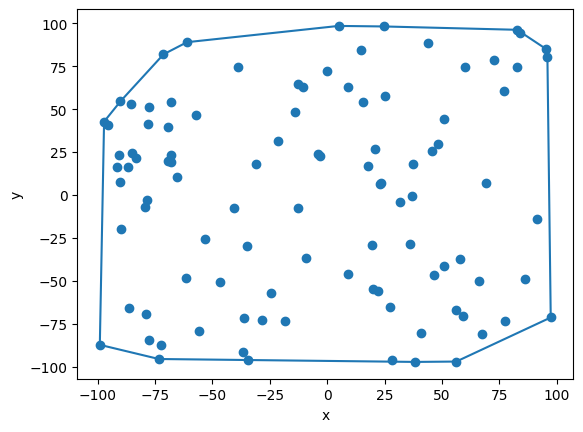

In [344]:
# visualize(jarvis_points_a)
vis.clear()
vis.add_point(points_a)
vis.add_line_segment([(jarvis_points_a[i], jarvis_points_a[i+1]) for i in range(len(jarvis_points_a)-1)])
vis.add_line_segment([jarvis_points_a[-1], jarvis_points_a[0]])
vis.show()

Zbiór danych B

In [345]:
start = datetime.datetime.now()
jarvis_points_b, vis_jarvis_b = jarvis_algorithm_draw(points_b)
stop = datetime.datetime.now()
TESTS["jarvis_points_b"] = round((stop - start).total_seconds(),6)

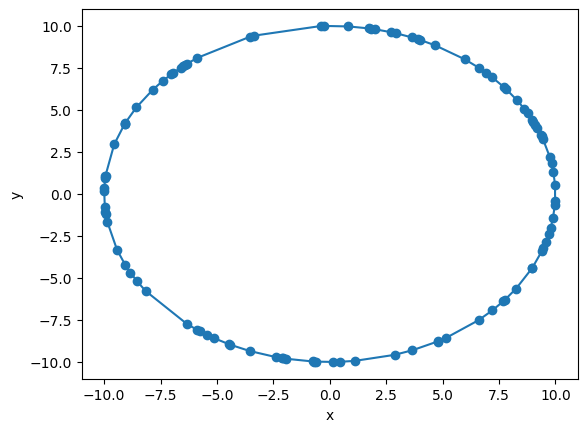

In [346]:
# visualize(jarvis_points_b)
vis.clear()
vis.add_point(points_b)
vis.add_line_segment([(jarvis_points_b[i], jarvis_points_b[i+1]) for i in range(len(jarvis_points_b)-1)])
vis.add_line_segment([jarvis_points_b[-1], jarvis_points_b[0]])
vis.show()

Zbiór danych C

In [347]:
start = datetime.datetime.now()
jarvis_points_c, vis_jarvis_c = jarvis_algorithm_draw(points_c)
stop = datetime.datetime.now()
TESTS["jarvis_points_c"] = round((stop - start).total_seconds(),6)

In [348]:
vis_jarvis_c.save_gif(filename="jarvis_algorithm_gifs/points_c",interval=1)

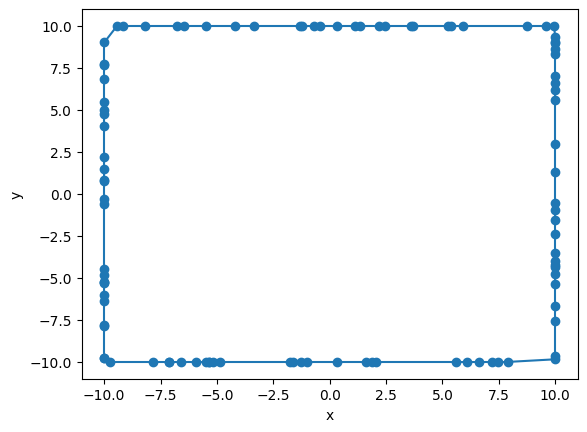

In [349]:
# visualize(jarvis_points_c)
vis.clear()
vis.add_point(points_c)
vis.add_line_segment([(jarvis_points_c[i], jarvis_points_c[i+1]) for i in range(len(jarvis_points_c)-1)])
vis.add_line_segment([jarvis_points_c[-1], jarvis_points_c[0]])
vis.show()

Zbiór danych D

In [350]:
start = datetime.datetime.now()
jarvis_points_d, vis_jarvis_d = jarvis_algorithm_draw(points_d)
stop = datetime.datetime.now()
TESTS["jarvis_points_d"] = round((stop - start).total_seconds(),6)

In [351]:
vis_jarvis_d.save_gif(filename="jarvis_algorithm_gifs/points_d",interval=1)

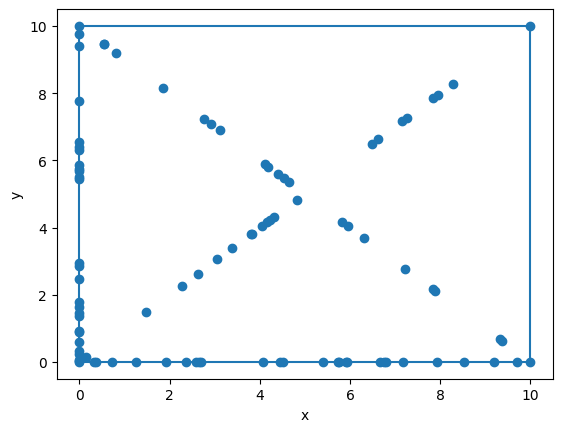

In [352]:
# visualize(jarvis_points_d)
vis.clear()
vis.add_point(points_d)
vis.add_line_segment([(jarvis_points_d[i], jarvis_points_d[i+1]) for i in range(len(jarvis_points_d)-1)])
vis.add_line_segment([jarvis_points_d[-1], jarvis_points_d[0]])
vis.show()


---

Po zobaczeniu i przetestowaniu wstępnie zbiorów danych, przyszła kolej na porównanie czasów działania dla różnych danych. Do tego potrzebujemy bardziej miarodajnych zbiorów danych.  
<span style="color:red">Ćw.</span> Stwórz zmodyfikowane zbiory danych A, B, C oraz D - tak jak uważasz za słuszne.

In [353]:
points_a_1000 = generate_uniform_points(-100, 100, 10 ** 3)
points_a_10000 = generate_uniform_points(-100, 100, 10 ** 4)
points_a_100000 = generate_uniform_points(-100, 100, 10 ** 5)
points_b_20 = generate_circle_points((0, 0), 15, 20)
points_b_50 = generate_circle_points((0, 0), 10, 50)
points_c_tilted = generate_rectangle_points_second((-2,4),(-0.6,1.2),(1,2),(-0.4,4.8))
points_d_tilted = generate_square_points((-2,4),(-0.6,1.2),(1,2),(-0.4,4.8), 25, 20)

---

<span style="color:red">Wyswietlanie</span> Wszystkie zbiory dodatowe sa wygnerowane następujaco:

## Zbiory odpowiednio: points_a_1000, points_a_10000, points_a_100000, points_b_20, points_b_50, points_c_titiled, points_d_titiled

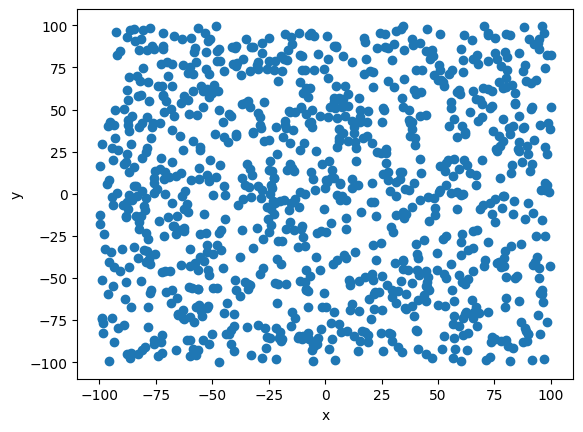

In [354]:
vis.clear()
vis.add_point(points_a_1000)
vis.show()

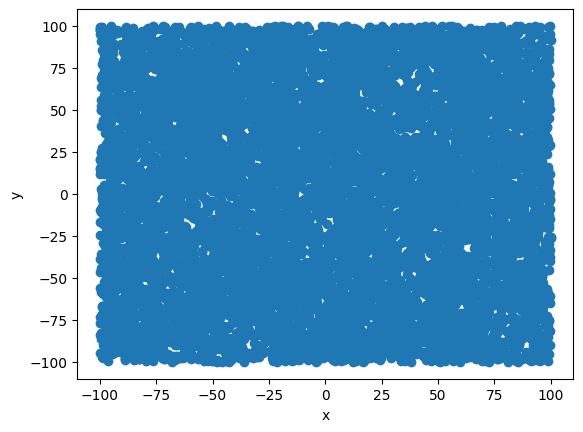

In [355]:
vis.clear()
vis.add_point(points_a_10000)
vis.show()

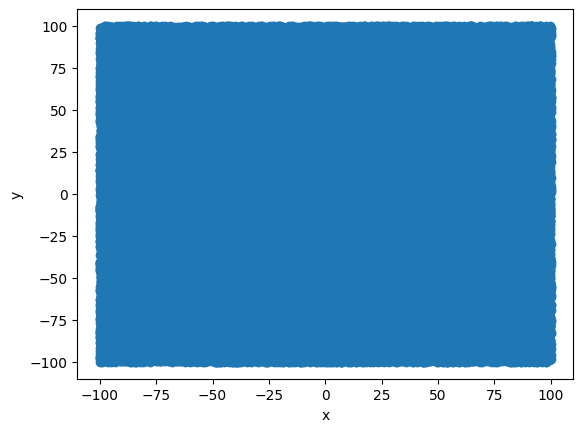

In [356]:
vis.clear()
vis.add_point(points_a_100000)
vis.show()

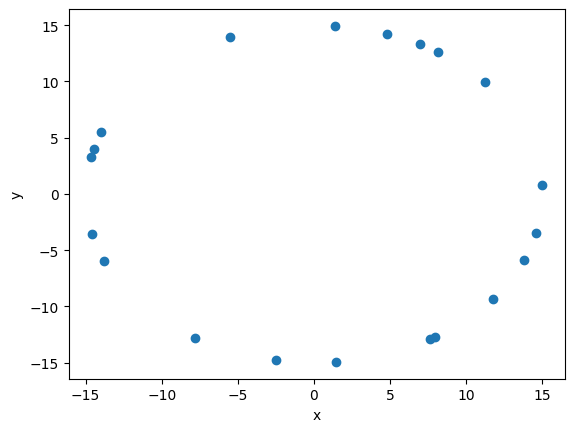

In [357]:
vis.clear()
vis.add_point(points_b_20) #DODAC GIFA!!!!
vis.show()

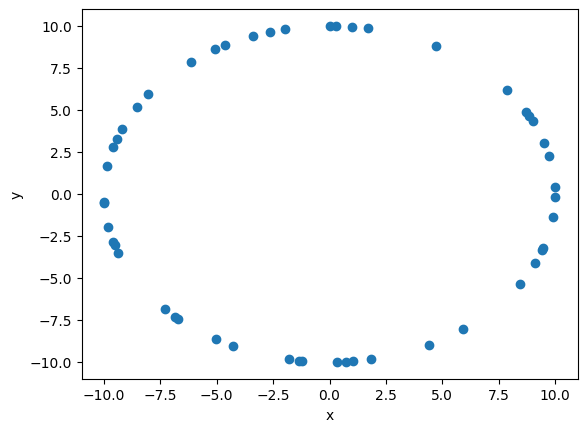

In [358]:
vis.clear()
vis.add_point(points_b_50)
vis.show()

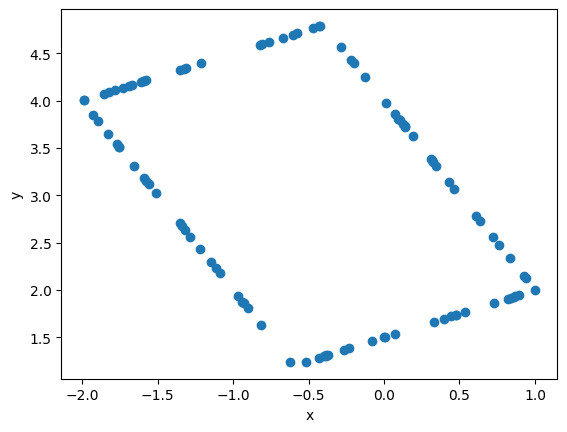

In [359]:
vis.clear()
vis.add_point(points_c_tilted)
vis.show()

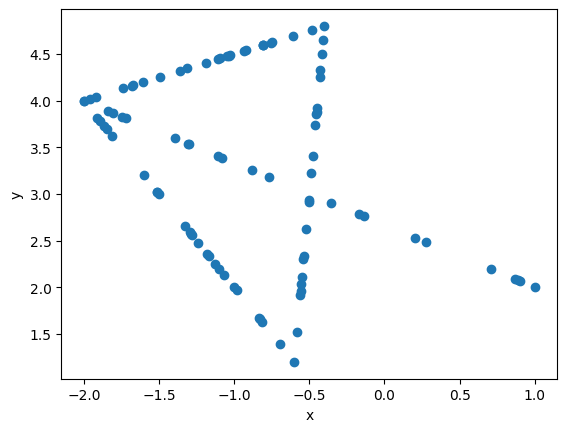

In [360]:
vis.clear()
vis.add_point(points_d_tilted)
vis.show()

Po przygotowaniu zbioru danych, dokonaj porównania czasowego  
<span style="color:red">Ćw.</span> Porównaj zmodyfikowane zbiory danych A, B, C oraz D dla algorytmów Grahama i Jarvisa.

In [361]:
#JARVIS
start = datetime.datetime.now()
jarvis_points_a_1000, vis_jarvis_points_a_1000 = jarvis_algorithm_draw(points_a_1000)
stop = datetime.datetime.now()
TESTS["jarvis_points_a_1000"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
jarvis_points_a_10000, vis_jarvis_points_a_10000 = jarvis_algorithm_draw(points_a_10000)
stop = datetime.datetime.now()
TESTS["jarvis_points_a_10000"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
jarvis_points_a_100000, vis_jarvis_points_a_100000 = jarvis_algorithm_draw(points_a_100000)
stop = datetime.datetime.now()
TESTS["jarvis_points_a_100000"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
jarvis_points_b_20, vis_jarvis_points_b_20 = jarvis_algorithm_draw(points_b_20)
stop = datetime.datetime.now()
TESTS["jarvis_points_b_20"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
jarvis_points_b_50, vis_jarvis_points_b_50 = jarvis_algorithm_draw(points_b_50)
stop = datetime.datetime.now()
TESTS["jarvis_points_b_50"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
jarvis_points_c_titled, vis_jarvis_points_c_titled = jarvis_algorithm_draw(points_c_tilted)
stop = datetime.datetime.now()
TESTS["jarvis_points_c_titled"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
jarvis_points_d_tilted, vis_jarvis_points_d_tilted = jarvis_algorithm_draw(points_d_tilted)
stop = datetime.datetime.now()
TESTS["jarvis_points_d_tilted"] = round((stop - start).total_seconds(),6)

In [362]:
#GRAHAM
start = datetime.datetime.now()
graham_points_a_1000, vis_graham_points_a_1000 = graham_algorithm_draw(points_a_1000)
stop = datetime.datetime.now()
TESTS["graham_points_a_1000"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
graham_points_a_10000, vis_graham_points_a_10000 = graham_algorithm_draw(points_a_10000)
stop = datetime.datetime.now()
TESTS["graham_points_a_10000"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
graham_points_a_100000, vis_graham_points_a_100000 = graham_algorithm_draw(points_a_100000)
stop = datetime.datetime.now()
TESTS["graham_points_a_100000"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
graham_points_b_20, vis_graham_points_b_20 = graham_algorithm_draw(points_b_20)
stop = datetime.datetime.now()
TESTS["graham_points_b_20"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
graham_points_b_50, vis_graham_points_b_50 = graham_algorithm_draw(points_b_50)
stop = datetime.datetime.now()
TESTS["graham_points_b_50"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
graham_points_c_titled, vis_graham_points_c_titled = graham_algorithm_draw(points_c_tilted)
stop = datetime.datetime.now()
TESTS["graham_points_c_titled"] = round((stop - start).total_seconds(),6)

start = datetime.datetime.now()
graham_points_d_tilted, vis_graham_points_d_tilted = graham_algorithm_draw(points_d_tilted)
stop = datetime.datetime.now()
TESTS["graham_points_d_tilted"] = round((stop - start).total_seconds(),6)

## Otoczki wypulke dla odpowiednio zbiorow: points_a_1000, points_a_10000, points_a_100000, points_b_20, points_b_50, points_c_titiled, points_d_titiled

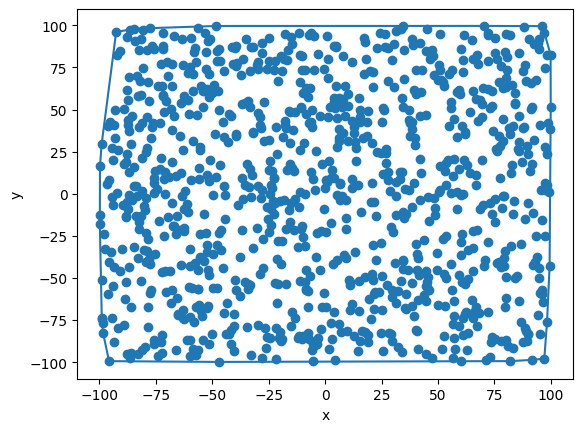

In [363]:
vis.clear()
vis.add_point(points_a_1000)
vis.add_line_segment([(graham_points_a_1000[i], graham_points_a_1000[i+1]) for i in range(len(graham_points_a_1000)-1)])
vis.add_line_segment([graham_points_a_1000[-1], graham_points_a_1000[0]])
vis.show()

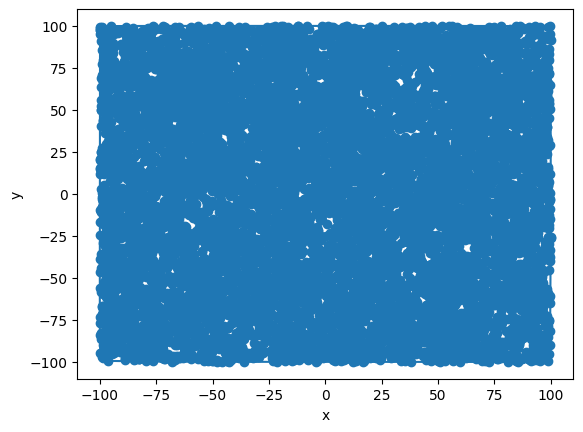

In [364]:
vis.clear()
vis.add_point(points_a_10000)
vis.add_line_segment([(graham_points_a_10000[i], graham_points_a_10000[i+1]) for i in range(len(graham_points_a_10000)-1)])
vis.add_line_segment([graham_points_a_10000[-1], graham_points_a_10000[0]])
vis.show()

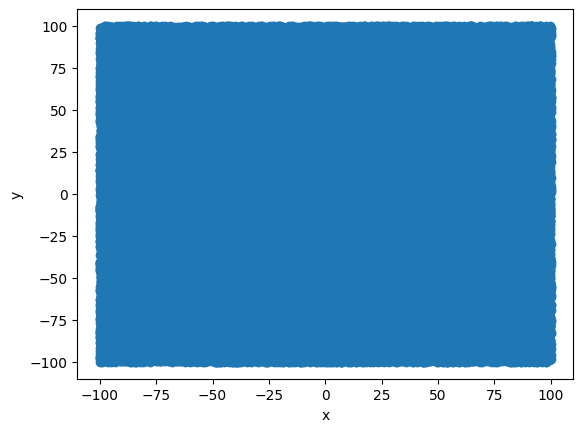

In [365]:
vis.clear()
vis.add_point(points_a_100000)
vis.add_line_segment([(graham_points_a_100000[i], graham_points_a_100000[i+1]) for i in range(len(graham_points_a_100000)-1)])
vis.add_line_segment([graham_points_a_100000[-1], graham_points_a_100000[0]])
vis.show()

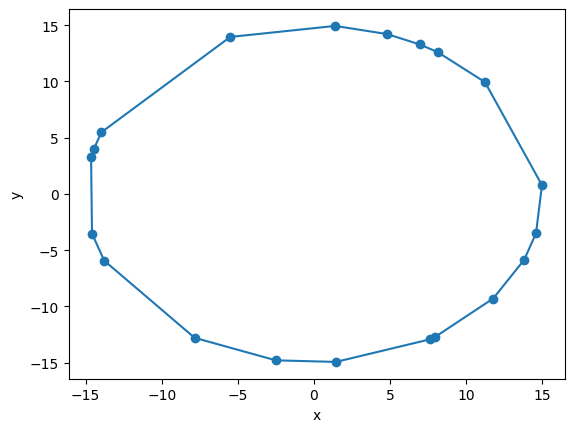

In [366]:
vis.clear()
vis.add_point(points_b_20)
vis.add_line_segment([(graham_points_b_20[i], graham_points_b_20[i+1]) for i in range(len(graham_points_b_20)-1)])
vis.add_line_segment([graham_points_b_20[-1], graham_points_b_20[0]])
vis.show()

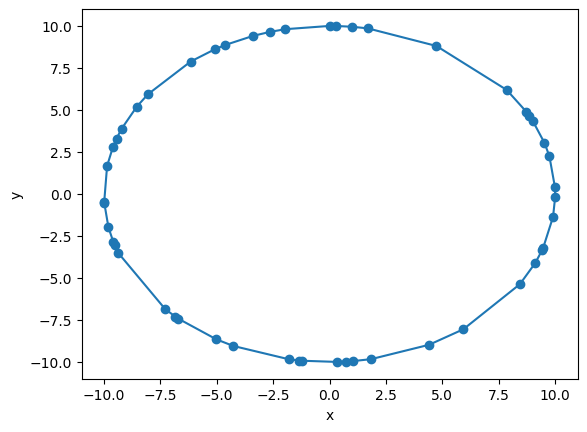

In [367]:
vis.clear()
vis.add_point(points_b_50)
vis.add_line_segment([(graham_points_b_50[i], graham_points_b_50[i+1]) for i in range(len(graham_points_b_50)-1)])
vis.add_line_segment([graham_points_b_50[-1], graham_points_b_50[0]])
vis.show()

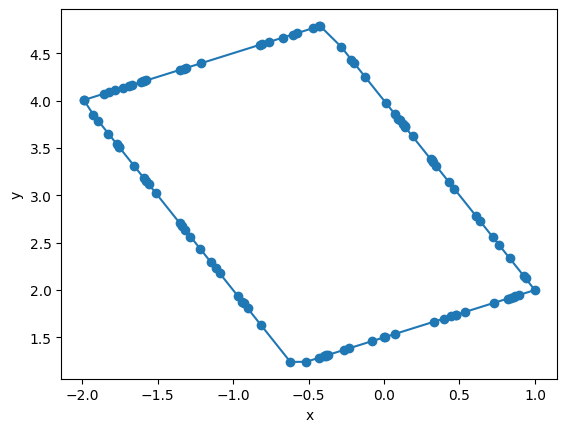

In [368]:
vis.clear()
vis.add_point(points_c_tilted) #graham_points_c_titled points_c_tilted
vis.add_line_segment([(graham_points_c_titled[i], graham_points_c_titled[i+1]) for i in range(len(graham_points_c_titled)-1)])
vis.add_line_segment([graham_points_c_titled[-1], graham_points_c_titled[0]])
vis.show()

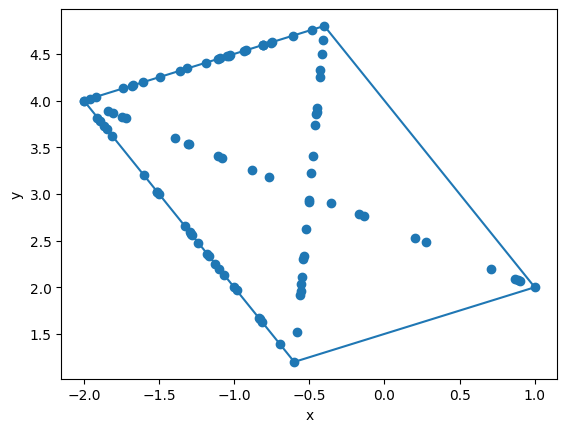

In [369]:
vis.clear()
vis.add_point(points_d_tilted)
vis.add_line_segment([(graham_points_d_tilted[i], graham_points_d_tilted[i+1]) for i in range(len(graham_points_d_tilted)-1)])
vis.add_line_segment([graham_points_d_tilted[-1], graham_points_d_tilted[0]])
vis.show()

In [370]:
print(TESTS)

{'graham_points_a': 0.001607, 'graham_points_b': 0.001744, 'graham_points_c': 0.003113, 'graham_points_d': 0.001295, 'jarvis_points_a': 0.001599, 'jarvis_points_b': 0.071968, 'jarvis_points_c': 0.001727, 'jarvis_points_d': 0.000558, 'jarvis_points_a_1000': 0.0216, 'jarvis_points_a_10000': 0.205309, 'jarvis_points_a_100000': 2.346308, 'jarvis_points_b_20': 0.001005, 'jarvis_points_b_50': 0.004488, 'jarvis_points_c_titled': 0.001402, 'jarvis_points_d_tilted': 0.000832, 'graham_points_a_1000': 0.538708, 'graham_points_a_10000': 0.226002, 'graham_points_a_100000': 3.281103, 'graham_points_b_20': 0.00036, 'graham_points_b_50': 0.000622, 'graham_points_c_titled': 0.0015, 'graham_points_d_tilted': 0.001263}


In [371]:
vis_jarvis_points_b_20.save_gif(filename="jarvis_algorithm_gifs/points_b_20",interval=1)